In [24]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, Heatmap

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.options.display.max_colwidth = 200

In [2]:
# obtained via CruzRojaSonora tweet_dumper.py
cr_df = pd.read_csv('CruzRojaSonora_tweets.csv')

## tweets crudos csv

In [3]:
cr_df

,id,created_at,text
0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierr..."
1,1539849379888128002,2022-06-23 05:54:35+00:00,b'Personal de #CruzRojaMexicana auxilian a un ...
2,1539836797601161218,2022-06-23 05:04:35+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...
3,1539833560349249538,2022-06-23 04:51:44+00:00,b'Un #accidente de #tr\xc3\xa1nsito en Solidar...
4,1539818561639780352,2022-06-23 03:52:08+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...
...,...,...,...
3245,1506744506229665797,2022-03-23 21:27:38+00:00,b'#CruzRojaMexicana est\xc3\xa1 ayudando en un...
3246,1506742233852264449,2022-03-23 21:18:37+00:00,b'#CruzRojaMexicana est\xc3\xa1 atendiendo un ...
3247,1506740257945010187,2022-03-23 21:10:46+00:00,b'Una #ambulancia de #CruzRojaMexicana labora ...
3248,1506736651321630721,2022-03-23 20:56:26+00:00,b'Una #ambulancia de #CruzRojaMexicana est\xc3...


## filtrar tweets con link en el texto

In [12]:
def get_location_url(x):
    for w in x.split(' '):
    return x.split(' ')[-1].replace('"','')[:-1]
cr_df['location_url'] = cr_df['text'].apply(get_location_url)

In [23]:
def http_not_in(x):
    return 'https' not in x
cr_df.loc[cr_df['text'].apply(http_not_in)]

,id,created_at,text,location_url
175,1538198970710626304,2022-06-18 16:36:27+00:00,b'RT @RMardiniICRC: Delighted to meet VP Carlos Freaner &amp; SG Jos\xc3\xa9 Antonio Monroy @CruzRoja_MX\n\nWe\xe2\x80\x99re proud @ICRC to be such close partners jo\xe2\x80\xa6',jo\xe2\x80\xa6
814,1532130128632762370,2022-06-01 22:41:02+00:00,"b'RT @SonoraSeguridad: Nos reunimos con representantes del @CICR_DRMX y @CruzRojaSonora, instituciones humanitarias neutrales e imparciales.\xe2\x80\xa6'",imparciales.\xe2\x80\xa6
824,1531673822943924226,2022-05-31 16:27:51+00:00,"b'RT @GaboBentez: Param\xc3\xa9dicos de la delegaci\xc3\xb3n de Cruz Roja en Hermosillo, brindaron un total de 101 servicios de atenci\xc3\xb3n a la comunidad dur\xe2\x80\xa6'",dur\xe2\x80\xa6
827,1531309790261088259,2022-05-30 16:21:19+00:00,"b'RT @AmigosDurazo: #Guaymas: A partir de hoy, los residentes de #SanCarlos cuentan con un m\xc3\xb3dulo de @CruzRojaSonora, el cual est\xc3\xa1 en el Kil\xc3\xb3\xe2\x80\xa6'",Kil\xc3\xb3\xe2\x80\xa6
1028,1529142817209126912,2022-05-24 16:50:32+00:00,b'RT @tadeolopezrojas: Recibe Polic\xc3\xada Estatal capacitaci\xc3\xb3n en Primeros Auxilios B\xc3\xa1sicos por personal especializado de Cruz Roja Mexicana\n@Cru\xe2\x80\xa6',Mexicana\n@Cru\xe2\x80\xa6
1029,1529142124784013312,2022-05-24 16:47:47+00:00,"b'RT @ElliothLic: Se lleg\xc3\xb3 un acuerdo con la Cruz Roja mexicana, para qu\xc3\xa9 todos los cadetes a partir de la generaci\xc3\xb3n Delta cuenten con su ce\xe2\x80\xa6'",ce\xe2\x80\xa6
1325,1526275051862884352,2022-05-16 18:55:03+00:00,"b'Cruz Roja Mexicana en Sonora lamenta el sensible fallecimiento de Jos\xc3\xa9 Gabriel Guti\xc3\xa9rrez Figueroa, Expresidente de la Delegaci\xc3\xb3n Hermosillo 1987-1989 y distinguido miembro d...",resignaci\xc3\xb3n.
2586,1513272561227862018,2022-04-10 21:47:48+00:00,b'RT @rafarenteria11: Inauguran en San Carlos nuevas instalaciones de la base de Cruz Roja Mexicana; participa alcaldesa Karla Cordova Gonz\xc3\xa1l\xe2\x80\xa6',Gonz\xc3\xa1l\xe2\x80\xa6
2587,1513272522426355713,2022-04-10 21:47:39+00:00,"b'RT @P_Civil_Magazin: Inauguran nueva base de Cruz Roja en San Carlos, en Sonora. El m\xc3\xb3dulo fue construido en menos de un mes a fin de que e\xe2\x80\xa6'",e\xe2\x80\xa6
2588,1513272422874550273,2022-04-10 21:47:15+00:00,"b'RT @CelidaLopezc: Una bendici\xc3\xb3n para San Carlos, se inaugur\xc3\xb3 la primera base de @CruzRojaSonora gesti\xc3\xb3n de gente buena y con vocaci\xc3\xb3n de se\xe2\x80\xa6'",se\xe2\x80\xa6


In [26]:
def http_in(x):
    return 'https' in x
cr_locations_df = cr_df.loc[cr_df['location_url'].apply(http_in)]
cr_locations_df.shape

(3233, 4)

In [27]:
cr_locations_df.head()

,id,created_at,text,location_url
0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierra y Libertad, Navojoa, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/QZATOhRFmp'",https://t.co/QZATOhRFmp
1,1539849379888128002,2022-06-23 05:54:35+00:00,"b'Personal de #CruzRojaMexicana auxilian a un paciente en Londres, Prados Del Tepeyac, Cajeme, debido a un #accidente de #tr\xc3\xa1nsito https://t.co/q7If4FkKRA'",https://t.co/q7If4FkKRA
2,1539836797601161218,2022-06-23 05:04:35+00:00,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Conocido, centro, Benito Ju\xc3\xa1rez, extrema precacuciones al pasar por ese lugar https://t.co/ziFXBqmu7W'",https://t.co/ziFXBqmu7W
3,1539833560349249538,2022-06-23 04:51:44+00:00,"b'Un #accidente de #tr\xc3\xa1nsito en Solidaridad, Sahuaro, Hermosillo fue reportado a #CruzRojaMexicana, te recomendamos tener cuidado al transitar en esa zona https://t.co/hG0hoUYuKN'",https://t.co/hG0hoUYuKN
4,1539818561639780352,2022-06-23 03:52:08+00:00,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Abelardo l. Rodriguez, San Benito, Hermosillo, extrema precacuciones al pasar por ese lugar https://t.co/f8TE3r8ISy'",https://t.co/f8TE3r8ISy


In [29]:
cr_locations_df['location_url'][0]

'https://t.co/QZATOhRFmp'

In [30]:
r = requests.get(cr_locations_df['location_url'][0])

## leer coordenadas del link a google maps

In [64]:
import time

lat_lngs = []

for i, x in cr_locations_df.iterrows():
#     if i < len(lat_lngs):
#         continue
    r = requests.get(x['location_url'].replace("b'",''))
    url = r.url
    if 'sorry' in url:
        lat_lng = url.split('%3D')[-1].split('&')[0]
    else:
        lat_lng = url.split("=")[-1]
    lat_lngs.append(lat_lng)
    time.sleep(0.5)
    if i %100 == 0:
        print('requested',i)

# lat_lng = r.url.split("=")[-1]
# lat, lng = lat_lng.split(',')

requested 0
requested 100
requested 200
requested 300
requested 400
requested 500
requested 600
requested 700
requested 800
requested 900
requested 1000
requested 1100
requested 1200
requested 1300
requested 1400
requested 1500
requested 1600
requested 1700
requested 1800
requested 1900
requested 2000
requested 2100
requested 2200
requested 2300
requested 2400
requested 2500
requested 2600
requested 2700
requested 2800
requested 2900
requested 3000
requested 3100
requested 3200


In [65]:
print(cr_locations_df.shape)
print(len(lat_lngs))

(3233, 4)
3233


In [66]:
lls = lat_lngs.copy()

In [67]:
len(lls)

3233

In [73]:
lats, lngs = [], []
for ll in lat_lngs:
    if ',' in ll:
        lat, lng = ll.split(',')
    else:
        lat, lng = None, None
    lats.append(lat)
    lngs.append(lng)
cr_locations_df['lat'] = lats
cr_locations_df['lng'] = lngs
cr_locations_df.head()

/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_21697/1167112786.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_locations_df['lat'] = lats
/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_21697/1167112786.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cr_locations_df['lng'] = lngs


,id,created_at,text,location_url,lat,lng
0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierra y Libertad, Navojoa, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/QZATOhRFmp'",https://t.co/QZATOhRFmp,27.0772501,-109.4169878
1,1539849379888128002,2022-06-23 05:54:35+00:00,"b'Personal de #CruzRojaMexicana auxilian a un paciente en Londres, Prados Del Tepeyac, Cajeme, debido a un #accidente de #tr\xc3\xa1nsito https://t.co/q7If4FkKRA'",https://t.co/q7If4FkKRA,27.4797596,-109.9578736
2,1539836797601161218,2022-06-23 05:04:35+00:00,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Conocido, centro, Benito Ju\xc3\xa1rez, extrema precacuciones al pasar por ese lugar https://t.co/ziFXBqmu7W'",https://t.co/ziFXBqmu7W,27.12767,-109.84091
3,1539833560349249538,2022-06-23 04:51:44+00:00,"b'Un #accidente de #tr\xc3\xa1nsito en Solidaridad, Sahuaro, Hermosillo fue reportado a #CruzRojaMexicana, te recomendamos tener cuidado al transitar en esa zona https://t.co/hG0hoUYuKN'",https://t.co/hG0hoUYuKN,28.8204192,-109.9170851
4,1539818561639780352,2022-06-23 03:52:08+00:00,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Abelardo l. Rodriguez, San Benito, Hermosillo, extrema precacuciones al pasar por ese lugar https://t.co/f8TE3r8ISy'",https://t.co/f8TE3r8ISy,29.091275,-110.9582457


### guardar tweets con coordenadas

In [74]:
# cr_locations_df.to_csv('cruzrojasonora_incidentes_2022.csv')

In [2]:
cr_locations_df = pd.read_csv('cruzrojasonora_incidentes_2022.csv')

In [5]:
cr_locations_df

,Unnamed: 0,id,created_at,text,location_url,lat,lng
0,0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierr...",https://t.co/QZATOhRFmp,27.077250,-109.416988
1,1,1539849379888128002,2022-06-23 05:54:35+00:00,b'Personal de #CruzRojaMexicana auxilian a un ...,https://t.co/q7If4FkKRA,27.479760,-109.957874
2,2,1539836797601161218,2022-06-23 05:04:35+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/ziFXBqmu7W,27.127670,-109.840910
3,3,1539833560349249538,2022-06-23 04:51:44+00:00,b'Un #accidente de #tr\xc3\xa1nsito en Solidar...,https://t.co/hG0hoUYuKN,28.820419,-109.917085
4,4,1539818561639780352,2022-06-23 03:52:08+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/f8TE3r8ISy,29.091275,-110.958246
...,...,...,...,...,...,...,...
3228,3245,1506744506229665797,2022-03-23 21:27:38+00:00,b'#CruzRojaMexicana est\xc3\xa1 ayudando en un...,https://t.co/cvHT3F6llC,30.694958,-112.262902
3229,3246,1506742233852264449,2022-03-23 21:18:37+00:00,b'#CruzRojaMexicana est\xc3\xa1 atendiendo un ...,https://t.co/44Hr7HBWOO,26.765203,-109.234090
3230,3247,1506740257945010187,2022-03-23 21:10:46+00:00,b'Una #ambulancia de #CruzRojaMexicana labora ...,https://t.co/Is8xvQQ38z,31.313524,-109.564247
3231,3248,1506736651321630721,2022-03-23 20:56:26+00:00,b'Una #ambulancia de #CruzRojaMexicana est\xc3...,https://t.co/JXlGZcttSn,30.704332,-112.164067


### ploteo inicial

<AxesSubplot:xlabel='lng', ylabel='lat'>

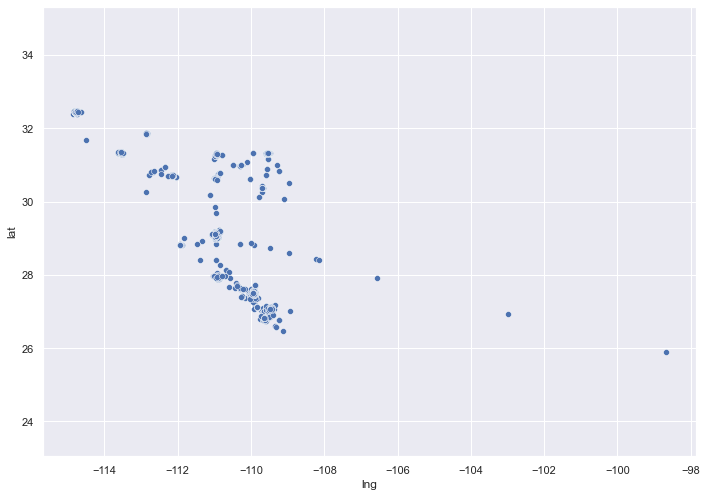

In [35]:
plt.axis('equal')
sns.scatterplot(data=cr_locations_df, x='lng', y='lat')

In [31]:
# clean outsiders
cr_locations_df.describe()

,Unnamed: 0,id,lat,lng,latBin,lonBin
count,3233.000000,3.233000e+03,3202.000000,3202.000000,3202.000000,3202.000000
mean,1624.677080,1.523313e+18,29.359873,-111.059013,29.263835,-111.133104
std,938.574653,9.687336e+15,1.622968,1.398517,1.623029,1.390056
min,0.000000,1.506696e+18,25.883186,-114.867222,25.800000,-115.000000
25%,810.000000,1.514743e+18,27.923015,-111.001939,27.800000,-111.200000
50%,1626.000000,1.523300e+18,29.093736,-110.955392,29.000000,-111.000000
75%,2434.000000,1.532145e+18,30.984564,-109.951690,30.800000,-110.000000
max,3249.000000,1.539857e+18,32.482721,-98.670957,32.400000,-98.800000


## dividir en cuadrantes

In [44]:
step = 0.2
to_bin = lambda x, s: np.floor(x / s) * s
cr_locations_df["latBin"] = to_bin(cr_locations_df.lat, step)
cr_locations_df["lonBin"] = to_bin(cr_locations_df.lng, step)
cr_locations_df["latlngBin"] = cr_locations_df["latBin"].map(str) + ',' + cr_locations_df['lonBin'].map(str)
cr_locations_df

,Unnamed: 0,id,created_at,text,location_url,lat,lng,latBin,lonBin,latlngBin
0,0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierr...",https://t.co/QZATOhRFmp,27.077250,-109.416988,27.0,-109.6,"27.0,-109.60000000000001"
1,1,1539849379888128002,2022-06-23 05:54:35+00:00,b'Personal de #CruzRojaMexicana auxilian a un ...,https://t.co/q7If4FkKRA,27.479760,-109.957874,27.4,-110.0,"27.400000000000002,-110.0"
2,2,1539836797601161218,2022-06-23 05:04:35+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/ziFXBqmu7W,27.127670,-109.840910,27.0,-110.0,"27.0,-110.0"
3,3,1539833560349249538,2022-06-23 04:51:44+00:00,b'Un #accidente de #tr\xc3\xa1nsito en Solidar...,https://t.co/hG0hoUYuKN,28.820419,-109.917085,28.8,-110.0,"28.8,-110.0"
4,4,1539818561639780352,2022-06-23 03:52:08+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/f8TE3r8ISy,29.091275,-110.958246,29.0,-111.0,"29.0,-111.0"
...,...,...,...,...,...,...,...,...,...,...
3228,3245,1506744506229665797,2022-03-23 21:27:38+00:00,b'#CruzRojaMexicana est\xc3\xa1 ayudando en un...,https://t.co/cvHT3F6llC,30.694958,-112.262902,30.6,-112.4,"30.6,-112.4"
3229,3246,1506742233852264449,2022-03-23 21:18:37+00:00,b'#CruzRojaMexicana est\xc3\xa1 atendiendo un ...,https://t.co/44Hr7HBWOO,26.765203,-109.234090,26.6,-109.4,"26.6,-109.4"
3230,3247,1506740257945010187,2022-03-23 21:10:46+00:00,b'Una #ambulancia de #CruzRojaMexicana labora ...,https://t.co/Is8xvQQ38z,31.313524,-109.564247,31.2,-109.6,"31.200000000000003,-109.60000000000001"
3231,3248,1506736651321630721,2022-03-23 20:56:26+00:00,b'Una #ambulancia de #CruzRojaMexicana est\xc3...,https://t.co/JXlGZcttSn,30.704332,-112.164067,30.6,-112.2,"30.6,-112.2"


<AxesSubplot:xlabel='lonBin', ylabel='latBin'>

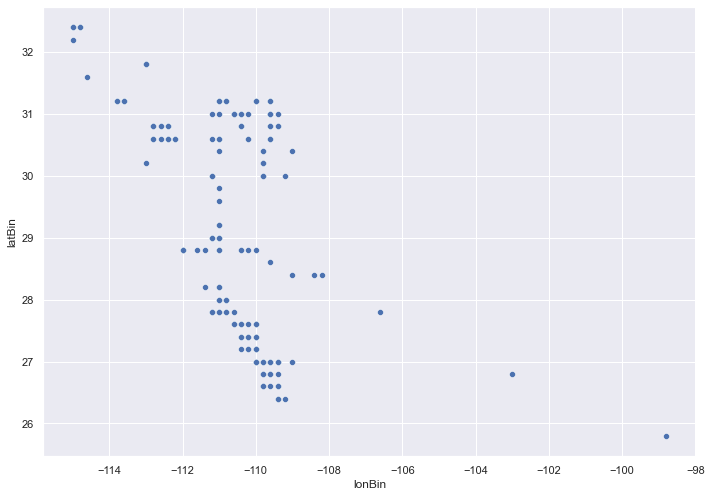

In [55]:
sns.scatterplot(data=cr_locations_df, x='lonBin', y='latBin')

In [53]:
len(cr_locations_df.latlngBin.unique())

91

In [51]:
pd.set_option('display.max_rows', 500)
cr_locations_df.latlngBin.value_counts()

29.0,-111.0                               959
27.400000000000002,-110.0                 391
29.0,-111.2                               220
31.200000000000003,-111.0                 211
32.4,-114.80000000000001                  197
27.0,-109.60000000000001                  187
27.8,-111.0                               165
31.200000000000003,-113.60000000000001    149
30.6,-112.2                               139
31.200000000000003,-109.60000000000001    123
26.8,-109.80000000000001                   56
30.8,-110.4                                48
30.6,-111.0                                32
nan,nan                                    31
32.4,-115.0                                26
27.8,-110.80000000000001                   20
31.8,-113.0                                17
28.8,-112.0                                17
30.200000000000003,-109.80000000000001     15
27.6,-110.4                                12
26.6,-109.80000000000001                   11
30.6,-112.4                       

### dividir puntos fuera de sonora

In [84]:
pure_locations = cr_locations_df[cr_locations_df['lonBin'] <= -108]
outside_df = cr_locations_df[cr_locations_df['lonBin'] > -108]

In [216]:
outside_df

,Unnamed: 0,id,created_at,text,location_url,lat,lng,latBin,lonBin,latlngBin
1430,1440,1525313343480905728,2022-05-14 03:13:34+00:00,"b'Veh\xc3\xadculos de #emergencia y #CruzRojaMexicana acuden a Antonio Quiroga, Parque Industrial, Hermosillo a auxiliar por un #accidente de #tr\xc3\xa1nsito https://t.co/QHlbg7qEl5'",https://t.co/QHlbg7qEl5,26.942162,-102.989798,26.8,-103.0,"26.8,-103.0"
2304,2314,1515804186776113157,2022-04-17 21:27:35+00:00,"b'Una #ambulancia de #CruzRojaMexicana labora atendiendo a un paciente herido por un #accidente de #tr\xc3\xa1nsito en Ignacio Salazar, La Misi\xc3\xb3n, Hermosillo https://t.co/mEVqpoigs7'",https://t.co/mEVqpoigs7,25.883186,-98.670957,25.8,-98.8,"25.8,-98.80000000000001"
2947,2964,1509605018487382016,2022-03-31 18:54:18+00:00,"b'En la direcci\xc3\xb3n Jesus Garcia Morales, San Andr\xc3\xa9s Residencial, Hermosillo, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/RmY9FCpQPo'",https://t.co/RmY9FCpQPo,27.928058,-106.563300,27.8,-106.6,"27.8,-106.60000000000001"


In [59]:
pure_locations

,Unnamed: 0,id,created_at,text,location_url,lat,lng,latBin,lonBin,latlngBin
0,0,1539857209210839041,2022-06-23 06:25:42+00:00,"b'En la direcci\xc3\xb3n Aquiles Serdan, Tierr...",https://t.co/QZATOhRFmp,27.077250,-109.416988,27.0,-109.6,"27.0,-109.60000000000001"
1,1,1539849379888128002,2022-06-23 05:54:35+00:00,b'Personal de #CruzRojaMexicana auxilian a un ...,https://t.co/q7If4FkKRA,27.479760,-109.957874,27.4,-110.0,"27.400000000000002,-110.0"
2,2,1539836797601161218,2022-06-23 05:04:35+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/ziFXBqmu7W,27.127670,-109.840910,27.0,-110.0,"27.0,-110.0"
3,3,1539833560349249538,2022-06-23 04:51:44+00:00,b'Un #accidente de #tr\xc3\xa1nsito en Solidar...,https://t.co/hG0hoUYuKN,28.820419,-109.917085,28.8,-110.0,"28.8,-110.0"
4,4,1539818561639780352,2022-06-23 03:52:08+00:00,b'Estamos atendiendo en #CruzRojaMexicana un #...,https://t.co/f8TE3r8ISy,29.091275,-110.958246,29.0,-111.0,"29.0,-111.0"
...,...,...,...,...,...,...,...,...,...,...
3228,3245,1506744506229665797,2022-03-23 21:27:38+00:00,b'#CruzRojaMexicana est\xc3\xa1 ayudando en un...,https://t.co/cvHT3F6llC,30.694958,-112.262902,30.6,-112.4,"30.6,-112.4"
3229,3246,1506742233852264449,2022-03-23 21:18:37+00:00,b'#CruzRojaMexicana est\xc3\xa1 atendiendo un ...,https://t.co/44Hr7HBWOO,26.765203,-109.234090,26.6,-109.4,"26.6,-109.4"
3230,3247,1506740257945010187,2022-03-23 21:10:46+00:00,b'Una #ambulancia de #CruzRojaMexicana labora ...,https://t.co/Is8xvQQ38z,31.313524,-109.564247,31.2,-109.6,"31.200000000000003,-109.60000000000001"
3231,3248,1506736651321630721,2022-03-23 20:56:26+00:00,b'Una #ambulancia de #CruzRojaMexicana est\xc3...,https://t.co/JXlGZcttSn,30.704332,-112.164067,30.6,-112.2,"30.6,-112.2"


(-115.20301298000001, -107.81561362, 26.165863985, 32.783523715)

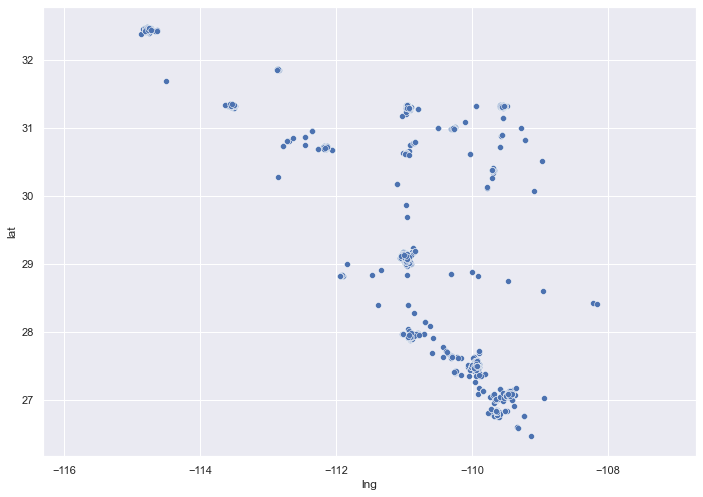

In [85]:
sns.scatterplot(data=pure_locations, x='lng', y='lat')
plt.axis('equal')

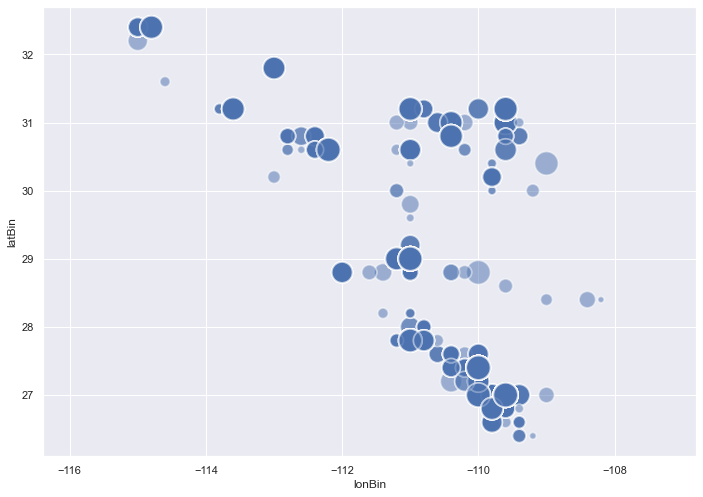

In [87]:
sns.scatterplot(data=pure_locations, x='lonBin', y='latBin', size='latlngBin', sizes=(40, 600), alpha=0.5)
plt.axis('equal')
plt.legend([],[], frameon=False)

## find good buckets

### nivel ciudad

In [91]:
step = 0.5
pure_locations["latBin"] = to_bin(pure_locations.lat, step)
pure_locations["lonBin"] = to_bin(pure_locations.lng, step)
pure_locations["latlngBin"] = pure_locations["latBin"].map(str) + ',' + pure_locations['lonBin'].map(str)
len(pure_locations.latlngBin.unique())

/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/636828017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_locations["latBin"] = to_bin(pure_locations.lat, step)
/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/636828017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_locations["lonBin"] = to_bin(pure_locations.lng, step)
/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/636828017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

46

In [92]:
pd.set_option('display.max_rows', 500)
pure_locations.latlngBin.value_counts()

29.0,-111.0    962
27.0,-110.0    355
32.0,-115.0    224
29.0,-111.5    220
31.0,-111.0    216
27.5,-111.0    187
27.0,-109.5    174
30.5,-112.5    158
31.0,-114.0    140
31.0,-110.0    135
27.5,-110.0     85
26.5,-110.0     71
30.5,-110.5     50
30.5,-111.0     33
30.0,-110.0     19
31.5,-113.0     17
27.0,-110.5     17
28.5,-112.0     17
27.5,-110.5     16
31.0,-110.5     13
31.0,-113.5     12
26.5,-109.5     12
28.0,-111.0     10
28.5,-111.0      9
30.5,-110.0      8
30.5,-113.0      7
27.5,-111.5      4
30.5,-109.5      3
28.5,-110.5      3
31.0,-109.5      2
30.0,-111.5      2
28.0,-108.5      2
28.5,-111.5      2
29.5,-111.0      2
27.0,-109.0      1
31.0,-111.5      1
28.5,-109.5      1
28.5,-110.0      1
30.5,-109.0      1
30.0,-109.5      1
30.0,-113.0      1
28.5,-109.0      1
30.5,-111.5      1
28.0,-111.5      1
31.5,-114.5      1
26.0,-109.5      1
Name: latlngBin, dtype: int64

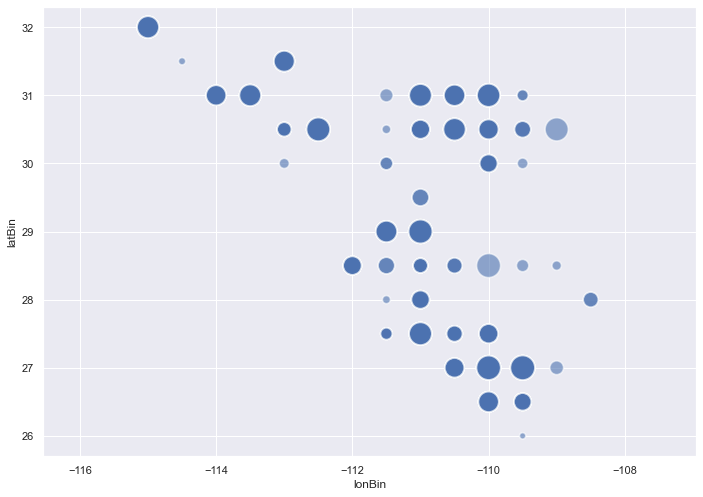

In [94]:
sns.scatterplot(data=pure_locations, x='lonBin', y='latBin', size='latlngBin', sizes=(40, 600), alpha=0.6)
plt.axis('equal')
plt.legend([],[], frameon=False)

In [83]:
pure_locations.latlngBin.value_counts()

29.0,-111.0    964
27.0,-110.0    614
31.0,-111.0    229
32.0,-115.0    224
27.0,-111.0    220
29.0,-112.0    220
30.0,-113.0    166
31.0,-114.0    152
31.0,-110.0    137
26.0,-110.0     84
30.0,-111.0     83
30.0,-110.0     31
28.0,-111.0     22
28.0,-112.0     20
31.0,-113.0     17
27.0,-112.0      4
28.0,-109.0      3
30.0,-112.0      3
28.0,-110.0      2
30.0,-109.0      1
27.0,-109.0      1
31.0,-112.0      1
31.0,-115.0      1
Name: latlngBin, dtype: int64

### nivel vecindario

In [268]:
# step = 0.5
step = 0.005
pure_locations["latBin"] = to_bin(pure_locations.lat, step)
pure_locations["lonBin"] = to_bin(pure_locations.lng, step)
pure_locations["latlngBin"] = pure_locations["latBin"].map(str) + ',' + pure_locations['lonBin'].map(str)
# len(pure_locations.latlngBin.unique())
pure_locations.latlngBin.value_counts()
pd.set_option('display.max_rows', 2000)
vc_df = pd.DataFrame(pure_locations.latlngBin.value_counts())
vc_df

/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/2610351361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_locations["latBin"] = to_bin(pure_locations.lat, step)
/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/2610351361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure_locations["lonBin"] = to_bin(pure_locations.lng, step)
/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/2610351361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

,latlngBin
"29.09,-110.97",63
"29.07,-110.96000000000001",43
"30.71,-112.155",42
"29.080000000000002,-110.955",39
"27.490000000000002,-109.935",33
"29.105,-110.97500000000001",23
"31.325,-109.515",22
"27.495,-109.935",21
"29.09,-110.965",20
"27.09,-109.45",19


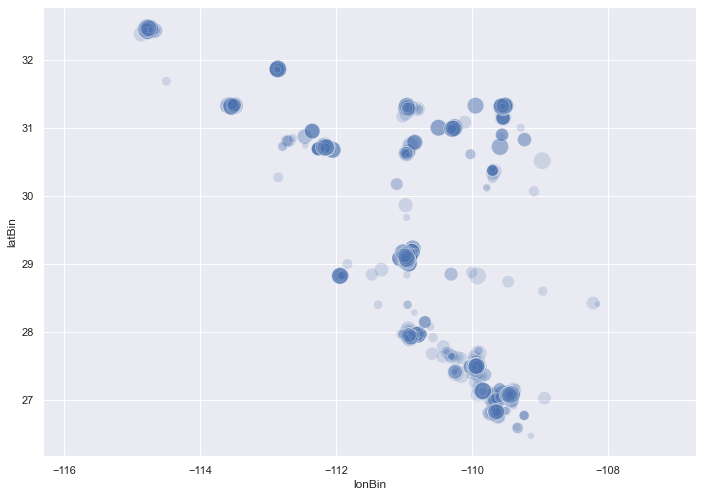

In [269]:
sns.scatterplot(data=pure_locations, x='lonBin', y='latBin', size='latlngBin', sizes=(40, 300), alpha=0.2)
plt.axis('equal')
plt.legend([],[], frameon=False)

In [270]:
# top_10
# 29.09,-110.97	                  63
# 29.07,-110.96000000000001	      43
# 30.71,-112.155	              42
# 29.080000000000002,-110.955	  39
# 27.490000000000002,-109.935	  33
# 29.105,-110.97500000000001	  23
# 31.325,-109.515	              22
# 27.495,-109.935	              21
# 29.09,-110.965	              20
# 27.09,-109.45	                  19
current_latlng = '29.09,-110.97'
# most_accidents = pure_locations[pure_locations['latlngBin'] == '29.07,-110.96000000000001']
most_accidents = pure_locations[pure_locations['latlngBin'] == current_latlng] 
most_accidents['latlng'] = most_accidents['lat'].map(str) + ',' + most_accidents['lng'].map(str)

/var/folders/s8/kl6fzfms2b7gvbxjt5t2wmr80000gn/T/ipykernel_6195/3776886481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_accidents['latlng'] = most_accidents['lat'].map(str) + ',' + most_accidents['lng'].map(str)


In [271]:
most_accidents

,Unnamed: 0,id,created_at,text,location_url,lat,lng,latBin,lonBin,latlngBin,latlng
31,31,1539632286013997057,2022-06-22 15:31:56+00:00,"b'#CruzRojaMexicana est\xc3\xa1 ayudando en un #accidente de #tr\xc3\xa1nsito en Veracruz, San Benito, Hermosillo, ten cuidado al pasar por el lugar https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
45,45,1539416362690412545,2022-06-22 01:13:56+00:00,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Luis Encinas Jhonson, San Benito, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
50,50,1539382260868304896,2022-06-21 22:58:25+00:00,"b'#CruzRojaMexicana est\xc3\xa1 ayudando en un #accidente de #tr\xc3\xa1nsito en Carretera 100, Miguel Alem\xc3\xa1n Centro, Hermosillo, ten cuidado al pasar por el lugar https://t.co/31de7f5yMf'",https://t.co/31de7f5yMf,29.093169,-110.965485,29.09,-110.97,"29.09,-110.97","29.0931691,-110.9654845"
58,58,1539297632052514816,2022-06-21 17:22:08+00:00,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Veracruz, San Benito, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
172,172,1538219233087303680,2022-06-18 17:56:58+00:00,"b'Al transitar por 12 de Octubre, San Benito, Hermosillo encontrar\xc3\xa1s un #accidente de #tr\xc3\xa1nsito atendido por #CruzRojaMexicana, ten cuidado y disminuye tu velocidad https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
401,402,1536050662567559171,2022-06-12 18:19:51+00:00,"b'Personal de #CruzRojaMexicana auxilian a un paciente en Rosales, San Benito, Hermosillo, debido a un #accidente de #tr\xc3\xa1nsito https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
402,403,1536050593281757184,2022-06-12 18:19:34+00:00,"b'En la direcci\xc3\xb3n Rosales, San Benito, Hermosillo, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
659,660,1533604258704199682,2022-06-06 00:18:42+00:00,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Felix Soria, San Benito, Hermosillo, extrema precacuciones al pasar por ese lugar https://t.co/a8s5OyGSlT'",https://t.co/a8s5OyGSlT,29.092608,-110.965566,29.09,-110.97,"29.09,-110.97","29.0926081,-110.9655659"
688,689,1533427836073156611,2022-06-05 12:37:40+00:00,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Frente al Hotel Premier, Miguel Alem\xc3\xa1n Centro, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/31de7f5yMf'",https://t.co/31de7f5yMf,29.093169,-110.965485,29.09,-110.97,"29.09,-110.97","29.0931691,-110.9654845"
689,690,1533427754410160130,2022-06-05 12:37:21+00:00,"b'En la direcci\xc3\xb3n Frente al Hotel Premier, Miguel Alem\xc3\xa1n Centro, Hermosillo, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/31de7f5yMf'",https://t.co/31de7f5yMf,29.093169,-110.965485,29.09,-110.97,"29.09,-110.97","29.0931691,-110.9654845"


In [272]:
pd.set_option('display.max_colwidth',1000)
text_df = pd.DataFrame(most_accidents['text'])
text_df

,text
31,"b'#CruzRojaMexicana est\xc3\xa1 ayudando en un #accidente de #tr\xc3\xa1nsito en Veracruz, San Benito, Hermosillo, ten cuidado al pasar por el lugar https://t.co/a8s5OyGSlT'"
45,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Luis Encinas Jhonson, San Benito, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/a8s5OyGSlT'"
50,"b'#CruzRojaMexicana est\xc3\xa1 ayudando en un #accidente de #tr\xc3\xa1nsito en Carretera 100, Miguel Alem\xc3\xa1n Centro, Hermosillo, ten cuidado al pasar por el lugar https://t.co/31de7f5yMf'"
58,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Veracruz, San Benito, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/a8s5OyGSlT'"
172,"b'Al transitar por 12 de Octubre, San Benito, Hermosillo encontrar\xc3\xa1s un #accidente de #tr\xc3\xa1nsito atendido por #CruzRojaMexicana, ten cuidado y disminuye tu velocidad https://t.co/a8s5OyGSlT'"
401,"b'Personal de #CruzRojaMexicana auxilian a un paciente en Rosales, San Benito, Hermosillo, debido a un #accidente de #tr\xc3\xa1nsito https://t.co/a8s5OyGSlT'"
402,"b'En la direcci\xc3\xb3n Rosales, San Benito, Hermosillo, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/a8s5OyGSlT'"
659,"b'Estamos atendiendo en #CruzRojaMexicana un #accidente de #tr\xc3\xa1nsito en Felix Soria, San Benito, Hermosillo, extrema precacuciones al pasar por ese lugar https://t.co/a8s5OyGSlT'"
688,"b'#CruzRojaMexicana est\xc3\xa1 atendiendo un #accidente de #tr\xc3\xa1nsito en Frente al Hotel Premier, Miguel Alem\xc3\xa1n Centro, Hermosillo con una #ambulancia donada con tus aportaciones https://t.co/31de7f5yMf'"
689,"b'En la direcci\xc3\xb3n Frente al Hotel Premier, Miguel Alem\xc3\xa1n Centro, Hermosillo, un veh\xc3\xadculo de #CruzRojaMexicana atiende un #accidente de #tr\xc3\xa1nsito, evita esas vialidades https://t.co/31de7f5yMf'"


(-110.96932017500001, -110.964852525, 29.091286115, 29.093857585000002)

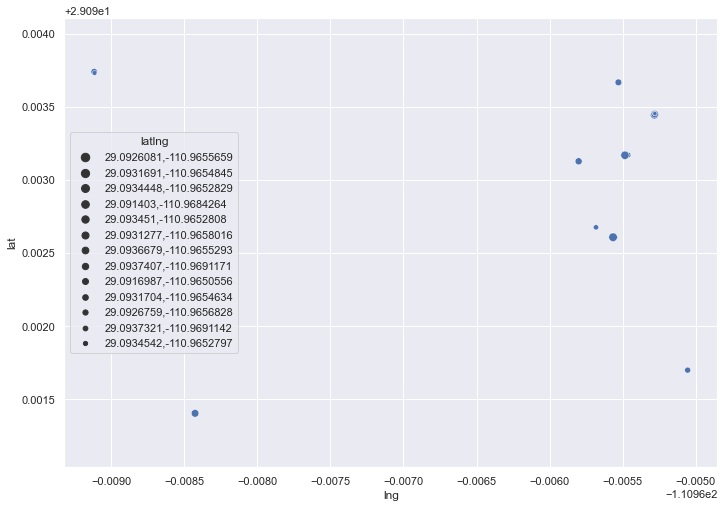

In [273]:
sns.scatterplot(data=most_accidents, x='lng', y='lat', size='latlng')
plt.axis('equal')

In [276]:
# center = [ float(x)+0.25 for x in current_latlng.split(',')]
if step == 0.5:
    zoom = 10
    recenter = 0.25
elif step == 0.005:
    zoom = 16
    recenter = 0.0025
center = [ float(x)+recenter for x in current_latlng.split(',')]
m = Map(center=center, zoom=zoom)
for (index, row) in most_accidents.iterrows():
    marker = Marker(location=[row.loc['lat'], row.loc['lng']], 
                    title=row.loc['text'])
    m.add_layer(marker)
m

Map(center=[29.0925, -110.9675], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [ ]:
# def dateIntensity(created_at):
#     dt = created_at.split(' ')[0]
#     dts = dt.split('-')
#     return ((float(dts[1])/6)*900) + (float(dts[2])*3)
# center = [29.123, -111.1924]
# zoom = 6
# m2 = Map(center=center, zoom=zoom)
# # m2

# heatmap = Heatmap(
#     locations=[[float(x['lat']), float(x['lng']), dateIntensity(x['created_at'])] for ix, x in cr_locations_df.iterrows()],
#     radius=10
# )

# m2.add_layer(heatmap);
# m2